In [1]:
import requests
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt

In [2]:
def get_df_from_url(url):
    # Send a GET request to the API URL
    req = requests.get(url)
    
    # Ensure the request was successful (status code 200)
    if req.status_code == 200:
        wb = req.json()  # Parse the JSON response
        
        # Check if the response is directly a list of records
        if isinstance(wb, list):
            # Directly normalize the list of records into a DataFrame
            df = pd.json_normalize(wb)
        else:
            # If the response contains a 'results' key, normalize that
            df = pd.json_normalize(wb.get("results", []))
        
        return df
    else:
        # Handle failed request (non-200 status code)
        print(f"Failed to retrieve data: {req.status_code}")
        return None

In [3]:
api_url_1='https://opendata.paris.fr/api/explore/v2.1/catalog/datasets/belib-points-de-recharge-pour-vehicules-electriques-donnees-statiques/exports/json'
api_url_2='https://opendata.paris.fr/api/explore/v2.1/catalog/datasets/belib-points-de-recharge-pour-vehicules-electriques-disponibilite-temps-reel/exports/json'
api_url_3='https://opendata.paris.fr/api/explore/v2.1/catalog/datasets/comptages-routiers-permanents/exports/json'

belib_statique=get_df_from_url(api_url_1)
belib_temps_reel=get_df_from_url(api_url_2)

In [20]:
belib_statique.shape

(1947, 43)

Disponibilité en temps réél des bornes de recharges

In [7]:
api_url_2 = 'https://opendata.paris.fr/api/explore/v2.1/catalog/datasets/belib-points-de-recharge-pour-vehicules-electriques-disponibilite-temps-reel/exports/json'

real_time_data = get_df_from_url(api_url_2)

real_time_data.columns

real_time_data.head()

,id_pdc,statut_pdc,url_description_pdc,last_updated,adresse_station,code_insee_commune,arrondissement,coordonneesxy.lon,coordonneesxy.lat,coordonneesxy
0,FR*V75*EPX08*18*6,Inconnu,https://parisdata.opendatasoft.com/explore/dat...,2023-10-24T05:58:37+00:00,7 boulevard Malesherbes 75008 Paris,75108,08e Arrondissement,2.322649,48.870600,NaN
1,FR*V75*PHBSAI*AUG*01*2,Mise en service planifiée,https://parisdata.opendatasoft.com/explore/dat...,2023-12-11T03:30:05+00:00,18 rue Laborde 75008 PARIS,None,08e Arrondissement,2.320347,48.875770,NaN
2,FR*V75*EPX08*03*6,Inconnu,https://parisdata.opendatasoft.com/explore/dat...,2022-06-13T02:30:01+00:00,66 Rue d'Astorg 75008 Paris,75108,08e Arrondissement,2.319389,48.872833,NaN
3,FR*V75*EPX08*03*1,Inconnu,https://parisdata.opendatasoft.com/explore/dat...,2022-06-13T02:30:01+00:00,66 Rue d'Astorg 75008 Paris,75108,08e Arrondissement,2.319389,48.872833,NaN
4,FR*V75*EPX08*03*3,Inconnu,https://parisdata.opendatasoft.com/explore/dat...,2022-06-13T02:30:01+00:00,66 Rue d'Astorg 75008 Paris,75108,08e Arrondissement,2.319389,48.872833,NaN


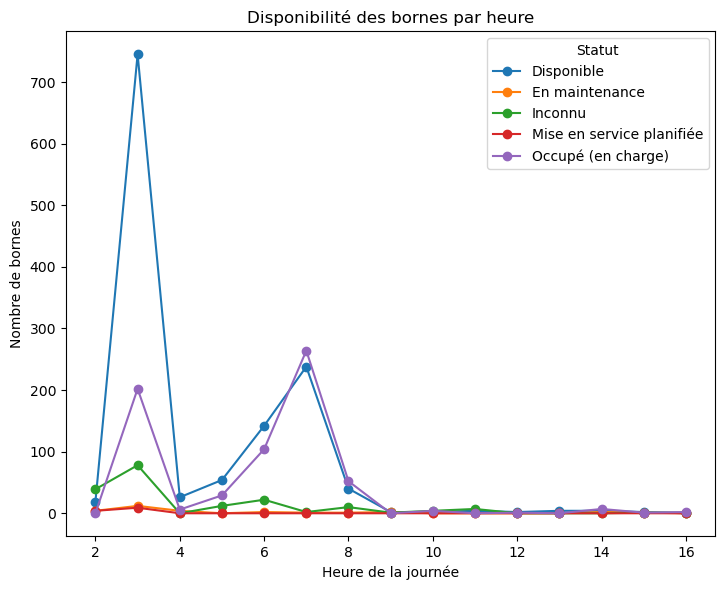

In [9]:
#Convertir last_updated en format datetime
real_time_data['last_updated'] = pd.to_datetime(real_time_data['last_updated'])

# Extraire les informations temporelles
real_time_data['hour'] = real_time_data['last_updated'].dt.hour
real_time_data['weekday'] = real_time_data['last_updated'].dt.day_name()

# Calculer la disponibilité moyenne par heure et par jour
hourly_status = real_time_data.groupby(['hour', 'statut_pdc']).size().unstack(fill_value=0)
weekday_status = real_time_data.groupby(['weekday', 'statut_pdc']).size().unstack(fill_value=0)

# Ordre des jours de la semaine
weekday_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
weekday_status = weekday_status.reindex(weekday_order)

# Graphiques de disponibilité moyenne
plt.figure(figsize=(14, 6))

# Graphique 1 : Tendances par heure
plt.subplot(1, 2, 1)
hourly_status.plot(kind='line', marker='o', ax=plt.gca())
plt.title("Disponibilité des bornes par heure")
plt.xlabel("Heure de la journée")
plt.ylabel("Nombre de bornes")
plt.legend(title="Statut")

plt.tight_layout()
plt.show()

In [16]:
real_time_data.sort_values('hour', ascending=False)

,id_pdc,statut_pdc,url_description_pdc,last_updated,adresse_station,code_insee_commune,arrondissement,coordonneesxy.lon,coordonneesxy.lat,coordonneesxy,hour,weekday
227,FR*V75*EPX07*03*6,Inconnu,https://parisdata.opendatasoft.com/explore/dat...,2024-04-11 16:03:51+00:00,None,None,None,NaN,NaN,NaN,16,Thursday
138,FR*V75*E9020*02*3,Occupé (en charge),https://parisdata.opendatasoft.com/explore/dat...,2024-03-16 16:17:41+00:00,227 Avenue Gambetta 75020 Paris,75120,20e Arrondissement,2.405196,48.874134,NaN,16,Saturday
69,FR*V75*EPX16*09*1,Occupé (en charge),https://parisdata.opendatasoft.com/explore/dat...,2023-10-30 16:13:04+00:00,72 Avenue Paul Doumer 75016 Paris,75116,16e Arrondissement,2.278694,48.859756,NaN,16,Monday
29,FR*V75*EPX02*09*4,Disponible,https://parisdata.opendatasoft.com/explore/dat...,2023-02-21 15:32:08+00:00,116 Rue Réaumur 75002 Paris,75102,Paris centre,2.345250,48.867810,NaN,15,Tuesday
63,FR*V75*EPX16*09*5,En maintenance,https://parisdata.opendatasoft.com/explore/dat...,2023-10-30 15:02:31+00:00,72 Avenue Paul Doumer 75016 Paris,75116,16e Arrondissement,2.278694,48.859756,NaN,15,Monday
...,...,...,...,...,...,...,...,...,...,...,...,...
54,FR*V75*EPX18*09*3,Inconnu,https://parisdata.opendatasoft.com/explore/dat...,2023-10-16 02:30:06+00:00,162 Rue Championnet 75018 Paris,75118,18e Arrondissement,2.335500,48.894900,NaN,2,Monday
55,FR*V75*EPX06*04*3,Inconnu,https://parisdata.opendatasoft.com/explore/dat...,2023-10-20 02:30:07+00:00,3 Rue de Bérite 75006 Paris,75106,06e Arrondissement,2.323978,48.847874,NaN,2,Friday
56,FR*V75*EPX06*04*4,Inconnu,https://parisdata.opendatasoft.com/explore/dat...,2023-10-20 02:30:07+00:00,3 Rue de Bérite 75006 Paris,75106,06e Arrondissement,2.323978,48.847874,NaN,2,Friday
58,FR*V75*EPX18*09*6,Inconnu,https://parisdata.opendatasoft.com/explore/dat...,2023-10-16 02:30:06+00:00,162 Rue Championnet 75018 Paris,75118,18e Arrondissement,2.335500,48.894900,NaN,2,Monday


In [ ]:
df = pd.read_csv('xtrain.csv')
df.head()

,timestamp,temperature,wind_speed,wind_gust_speed,rain_level,traffic_state,average_flow
0,2019-11-25T00:00:00+00:00,8.7,11.0,24.0,0.0,Fluid,218.1
1,2019-11-25T01:00:00+00:00,8.8,9.0,20.0,0.0,Fluid,144.3
2,2019-11-25T02:00:00+00:00,8.9,8.0,18.0,0.0,Fluid,110.0
3,2019-11-25T03:00:00+00:00,8.8,7.0,18.0,0.0,Fluid,143.8
4,2019-11-25T04:00:00+00:00,8.8,10.0,23.0,0.0,Fluid,315.1
